In [49]:
#import lib
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assignment 3

## Artificial Datasets

### Univariate Case :

#### a) Generate 500 real number for the variable X from the uniform distribution U [0,1].

#### b) Construct the training set T = { (x1,y1),(x2,y2),......,(x500,y500)} using the relation Yi = sin (2 π xi) + εi , where εi ~ N(0,0.25).

In [4]:
'''
    for creating train and test data
    low and high for range
    size for size of data
    mean and sigma for mean and sigma of error
'''
def get_x_y(low,high,size , mean , sigma):
    x = np.random.uniform(low,high,size)
    e = np.random.normal(mean,sigma,size)
    y = np.sin(2*math.pi*x)+e
    return x , y

In [5]:
# train set
np.random.seed(3)
train_x , train_y = get_x_y(low = 0 , high = 1 , size = 500 ,
                mean = 0 , sigma = 0.25)

In [6]:
train = np.array(tuple(zip(train_x,train_y)))

#### c) In a similar way construct a testing set of size 50 . Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)}

In [7]:
np.random.seed(15)

In [8]:
# test set
test_x,test_y = get_x_y(low = 0 , high = 1 , size = 50 ,
              mean = 0 , sigma = 0.25) 

In [9]:
test = np.array(tuple(zip(test_x,test_y)))

**d) Estimate the regularized least squared polynomial regression model of
order k = 1,2, 3, 7, using the training set T.**

In [10]:
lam = [2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2,2**3,2**4,2**5,2**6,2**7]

In [11]:
k = [1,2,3,7,9]

In [12]:
'''
    generate_A for creating A
    k = degree
    x = arr of col
'''
def generate_A( k , x ):
    A = []
    for i in range(k,-1,-1):
        new_col = x**i
        A.append(new_col)
    A = np.array(A).T
    return A

In [13]:
'''
    regularized least squared polynomial regression model
    k = degree
    lam = lambda
    data = train/test
    return coeff of poly in array format
'''
def coeff_of_poly( k , lam , data):
    X = data[:,0]
    Y = data[:,-1]
    A = generate_A(k,X)
    scalar_lam_matrix = lam*np.identity(len(A[0]))
    u = np.matmul((np.linalg.inv(scalar_lam_matrix+np.matmul(A.T,A))),(np.matmul(A.T,Y)))
    return u 

In [14]:
'''
    function to get rmse
    u = array of u
    k = degree
    data = train/test
    return rmse
'''
def RMSE(u , k ,data):
    x = data[:,0]
    Y = data[:,-1]
    A = generate_A(k,x)
    Y_hat = np.matmul(A,u)    # Y_hat is estimated value of y 
    
    rmse = math.sqrt(sum((Y - Y_hat)**2)/len(x))
    return rmse
   

In [15]:
'''
    for getting lowest rmse and return array of lambda for each degree
'''
def for_lowest_rmse(lam , k , data):
    min_rmse = 999999999999999999999
    arr_lam = []
    for degree in k:
        i = 0
        index = 0
        for lam_val in lam:
            u = coeff_of_poly(degree , lam_val , data)
            rmse = RMSE(u , degree , data)
            if rmse <= min_rmse:
                min_rmse = rmse
                index = i
                min_lam = lam_val
                
            i+=1
        arr_lam.append(min_lam)
        print("For {} degree rmse = {} for lam = {}".format(degree , min_rmse , lam[index] ))
    return arr_lam

In [16]:
arr_lam = for_lowest_rmse(lam , k , train)

For 1 degree rmse = 0.5101403106303704 for lam = 0.0078125
For 2 degree rmse = 0.5101403106303704 for lam = 0.0078125
For 3 degree rmse = 0.2620517960500484 for lam = 0.0078125
For 7 degree rmse = 0.2508281344808329 for lam = 0.0078125
For 9 degree rmse = 0.24538258246819475 for lam = 0.0078125


In [17]:
arr_lam

[0.0078125, 0.0078125, 0.0078125, 0.0078125, 0.0078125]

In [18]:
def print_poly(u):
    poly = ''
    for i in range(len(u)-1,0,-1):
        poly += '{}*x**{}+'.format(round(u[len(u)-i-1],4),i)
    poly+=str(round(u[-1],4))
    
    print(poly)
    return poly
        

In [19]:
coeff = []
arr_poly = []
print()
for i in range(len(k)) :
    print('*'*70)
    print("Polynomial for degree {} ".format(k[i]))
    u = coeff_of_poly( k[i] , arr_lam[i] , train)
    coeff.append(u)
    print("f(x) = ",end = " ")
    poly = print_poly(u)
    arr_poly.append(poly)
    print()
    


**********************************************************************
Polynomial for degree 1 
f(x) =  -1.9473*x**1+0.97

**********************************************************************
Polynomial for degree 2 
f(x) =  -0.0119*x**2+-1.9355*x**1+0.968

**********************************************************************
Polynomial for degree 3 
f(x) =  20.9793*x**3+-31.3104*x**2+10.5457*x**1+-0.0771

**********************************************************************
Polynomial for degree 7 
f(x) =  -6.9824*x**7+4.0132*x**6+9.5733*x**5+6.9369*x**4+-4.6993*x**3+-16.7104*x**2+8.1653*x**1+-0.0168

**********************************************************************
Polynomial for degree 9 
f(x) =  -6.8793*x**9+-1.3402*x**8+3.618*x**7+6.9752*x**6+7.3077*x**5+3.0541*x**4+-6.1295*x**3+-14.1906*x**2+7.6581*x**1+-0.0031



#### e) List the value of coefficients of estimated regularized least squared polynomial regression models for each case.

In [20]:
print("List of the value of coefficients of estimated tefularized least squared polynomial regression model for each list of degree")
print()
for ele in zip(k , coeff):

    print("="*60)
    print()
    print("coeff of degree {} is {}".format(ele[0] , ele[1] ))
    print()


List of the value of coefficients of estimated tefularized least squared polynomial regression model for each list of degree


coeff of degree 1 is [-1.94732396  0.96995972]


coeff of degree 2 is [-0.0119088  -1.93551759  0.96797479]


coeff of degree 3 is [ 20.97929766 -31.31042903  10.54566747  -0.07708942]


coeff of degree 7 is [ -6.98238413   4.01316209   9.57328855   6.93694073  -4.69929391
 -16.71036787   8.1652862   -0.01677538]


coeff of degree 9 is [-6.87934480e+00 -1.34023001e+00  3.61800568e+00  6.97515396e+00
  7.30767245e+00  3.05405743e+00 -6.12946813e+00 -1.41905842e+01
  7.65810489e+00 -3.06106553e-03]



In [21]:
print("List of Train RMSE for given diffrent degree.")
for ele in zip(k,coeff):
    rmse = RMSE(ele[1] , ele[0] , train)
    print("RMSE for degree {} = {}".format(ele[0] , round(rmse,4)))

List of Train RMSE for given diffrent degree.
RMSE for degree 1 = 0.5101
RMSE for degree 2 = 0.5101
RMSE for degree 3 = 0.2621
RMSE for degree 7 = 0.2508
RMSE for degree 9 = 0.2454


#### f) Obtain the prediction on testing set and compute the RMSE for regularized least squared polynomial regression models for order k=1,2,3 and 7.

In [22]:
print("List of TEST RMSE for given diffrent degree.")
for ele in zip(k,coeff):
    rmse = RMSE(ele[1] , ele[0] ,test)
    print("RMSE for degree {} = {}".format(ele[0] , round(rmse,4)))

List of TEST RMSE for given diffrent degree.
RMSE for degree 1 = 0.4964
RMSE for degree 2 = 0.4961
RMSE for degree 3 = 0.2692
RMSE for degree 7 = 0.2639
RMSE for degree 9 = 0.2621


#### g) Plot the estimate obtained by regularized least squared polynomial regression models for order k =1,2,3 and 7 for training set along with y1, y2, .., ,y20 . Also plot our actual mean estimate E(Y/xi) = sin (2 πxi) .

In [23]:
# draw a graph for train data and testing data
def graph_uni(k,arr_poly,data):
    for i  in range(len(k)):
        plt.figure(figsize=(8, 6))
        plt.scatter(data[:,0],data[:,1] , color = 'white',edgecolors = "orange"  )
        x = np.linspace(0, 1, 10000)
        y = np.sin(2*np.pi*x)
        plt.plot(x , y , label = "2*sin*pi*x" , color = 'red')

        x = np.linspace(0,1,10000)
        y = eval(arr_poly[i])
        plt.plot(x,y , label = "estimated curve of degree {}".format(k[i]) , color = "green")

        plt.xlabel("X - axis")
        plt.ylabel("Y - axis")
        plt.legend()

        

Graph for train data


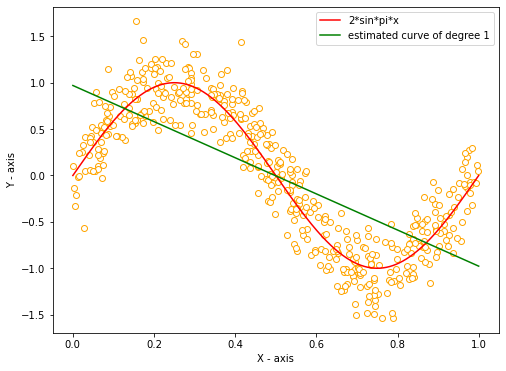

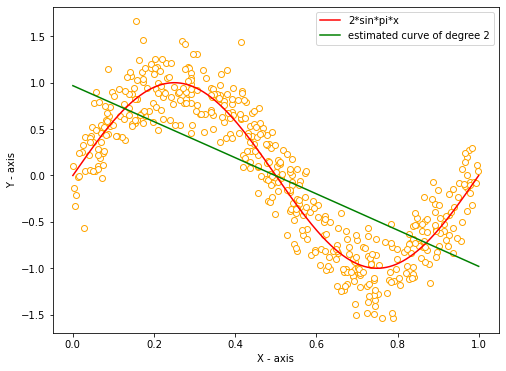

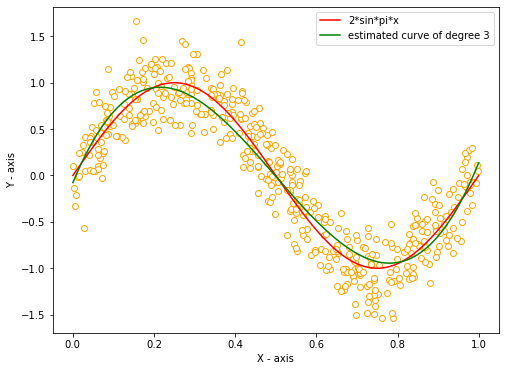

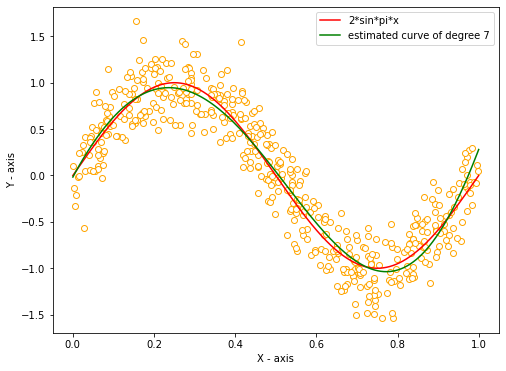

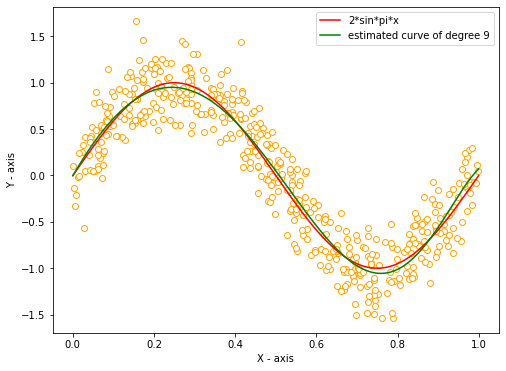

In [24]:
print("Graph for train data")
graph_uni(k,arr_poly,train)

**h) Plot the estimate obtained by regularized least squared polynomial regression models for order k =1,2,3 and 7 for testing set along with y’1, y’2,.. , y’50. Also plot the sin(2 π x’i) . Study the effect of regularization parameter λ on testing RMSE and flexibility of curve and list your observations.**

Graph for TEST data


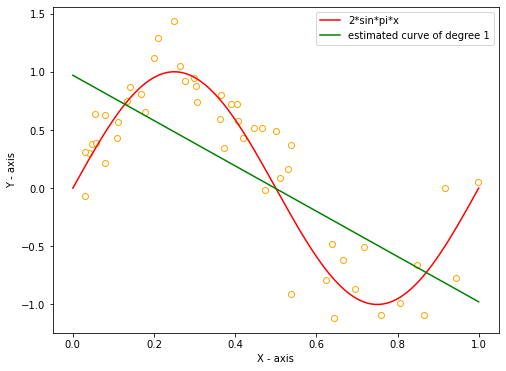

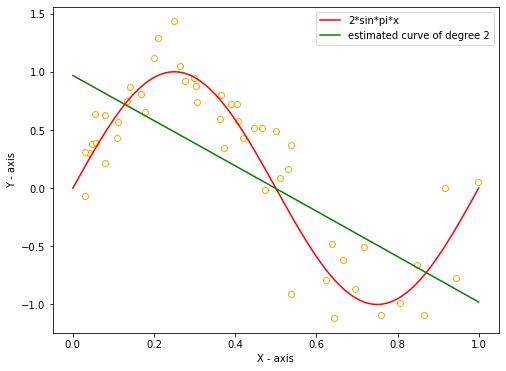

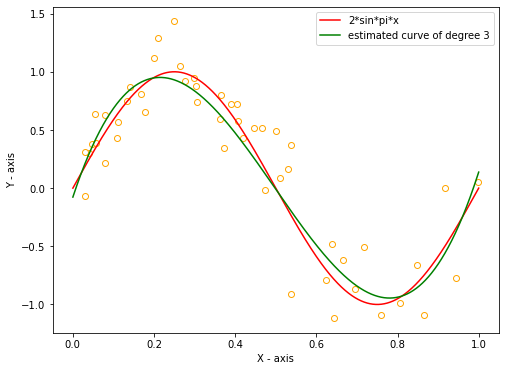

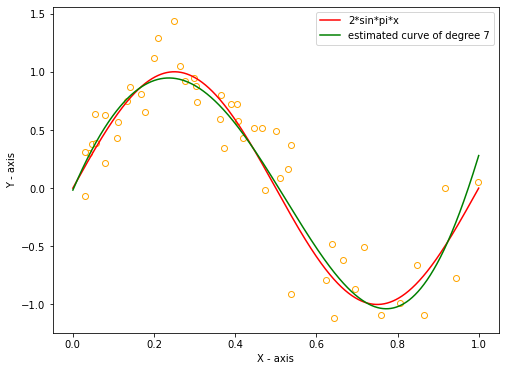

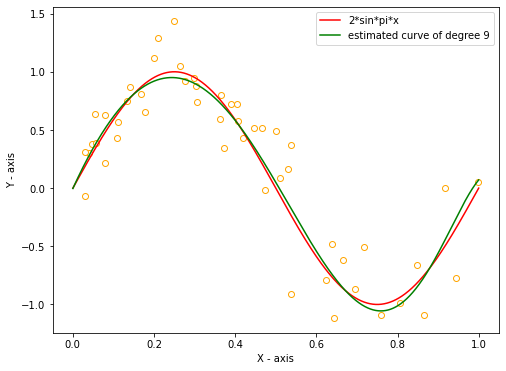

In [25]:
print("Graph for TEST data")
graph_uni(k,arr_poly,test)

*Observation :*

- Regularisation parameter lembda reduces flexibility of the polynomial model,leading to a simpler and less complex model.

- increasing the regularization parameter  will increase the penalty term and reduce the complexity of the model. As a result, the model will become less flexible and the testing RMSE will increase.

- Decreasing the regularization parameter  will decrease the penalty term and increase the complexity of the model. As a result, the model will become more flexible and the testing RMSE will decrease.

-  Regularization help us to prevent overfitting and improve the generalization performance of model.

## Bivariate Case :

#### a) Construct the training set T = {(x1,y1),(x2,y2),......,(x200,y200)} using the relation Yi = sin (2 π (||xi||) + εi where εi ~ N (0,0.25) and xi = [xi1,xi2], where xi1 and xi2 are from U[0,1]. In the similar way construct a testing set of size 50 Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)} .

In [26]:
np.random.seed(3)

In [27]:
def get_x1_x2_y(low,high,size , mean , sigma):
    x1 = np.random.uniform(low,high,size)
    x2 = np.random.uniform(low,high,size)
    e = np.random.normal(mean,sigma,size)
    y = np.sin(2*math.pi*np.sqrt(x1**2+x2**2))+e
    return x1 , x2 , y

In [28]:
train_x1, train_x2 , y  = get_x1_x2_y(0,1,200,0,0.25)

In [29]:
train = np.array(tuple(zip(train_x1,train_x2,y)))

In [30]:
np.random.seed(15)

In [31]:
test_x1, test_x2 , y  = get_x1_x2_y(0,1,50,0,0.25)

In [32]:
test = np.array(tuple(zip(test_x1,test_x2,y)))

In [33]:
k = [1,2,3]

In [34]:
lam = [2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2,2**3,2**4,2**5,2**6,2**7]

In [35]:
def generate_A_bivarite( k ,  data ):
    A = []
    for i in range(k,-1,-1):
        for j in range(i,-1,-1):
            new_col = (data[:,0]**(j))*(data[:,1]**(i-j))
            A.append(new_col)
    A = np.array(A).T
    return A

In [36]:
def coeff_of_poly_bivarite( k , lam , data):
    A = generate_A_bivarite(k,data)
    Y = data[:,-1]
    scalar_lam_matrix = lam*np.identity(((k+1)*(k+2))//2)
    u = np.matmul((np.linalg.inv(scalar_lam_matrix+np.matmul(A.T,A))),(np.matmul(A.T,Y)))

    return u 

In [37]:
def print_poly_bivarite(degree , u):
    poly = ''
    flag = 0
    for i in range(degree,0,-1):
        for j in range(i , -1 , -1):
            poly += '{}*(x1**{})*(x2**{})+'.format(u[flag],j,i-j)
            flag+=1
    poly+=str(u[-1])
    
    print(poly)
    return poly

In [38]:
def RMSE_bivarite(u , k ,data):
    x1 = data[:,0]
    x2 = data[:,1]
    Y = data[:,-1]
    A = generate_A_bivarite(k,data)
    Y_hat = np.matmul(A,u)    # Y_hat is estimated value of y 
    l = len(data[:,0])
    rmse = math.sqrt(sum((Y - Y_hat)**2/l))
    return rmse

In [39]:
def for_lowest_rmse(lam , k , train):
    min_rmse = 999999999999999999999
    arr_lam = []
    for degree in k:
        i = 0
        index = 0
        for lam_val in lam:
            u = coeff_of_poly_bivarite(degree , lam_val , train)
            rmse = RMSE_bivarite(u , degree , train)
            if rmse <= min_rmse:
                min_rmse = rmse
                index = i
                min_lam = lam_val
                
            i+=1
        arr_lam.append(min_lam)
        print("For {} degree rmse = {} for lam = {}".format(degree , min_rmse , lam[index] ))
    return arr_lam

In [40]:
arr_lam = for_lowest_rmse(lam , k , train)

For 1 degree rmse = 0.698952047478825 for lam = 0.0078125
For 2 degree rmse = 0.4034203675904977 for lam = 0.0078125
For 3 degree rmse = 0.35693626280172647 for lam = 0.0078125


In [41]:
coeff = []
arr_poly_bivarite = []
print()
for i in range(len(k)) :
    print('*'*70)
    print("Polynomial for degree {} ".format(k[i]))
    u = coeff_of_poly_bivarite( k[i] , arr_lam[i] , train)
    coeff.append(u)
    print("f(x) = ",end = " ")
    poly = print_poly_bivarite(k[i],u)
    arr_poly_bivarite.append(poly)
    print()
    


**********************************************************************
Polynomial for degree 1 
f(x) =  -0.04759006335492414*(x1**1)*(x2**0)+0.16422736200270727*(x1**0)*(x2**1)+-0.23004571996475282

**********************************************************************
Polynomial for degree 2 
f(x) =  3.7111963963370407*(x1**2)*(x2**0)+6.647923074659413*(x1**1)*(x2**1)+3.8899652294240328*(x1**0)*(x2**2)+-7.08396475337868*(x1**1)*(x2**0)+-6.991029613328166*(x1**0)*(x2**1)+2.743359837985864

**********************************************************************
Polynomial for degree 3 
f(x) =  5.389892792228096*(x1**3)*(x2**0)+-2.7686237426719487*(x1**2)*(x2**1)+-1.3948540871283726*(x1**1)*(x2**2)+5.589992715465151*(x1**0)*(x2**3)+-2.9393850548793807*(x1**2)*(x2**0)+10.767452637294383*(x1**1)*(x2**1)+-3.647481297365104*(x1**0)*(x2**2)+-5.487670940889217*(x1**1)*(x2**0)+-5.011153787677095*(x1**0)*(x2**1)+2.6091701092029354



In [42]:
print("List of the value of coefficients of estimated tefularized least squared polynomial regression model for each list of degree")
print()
for ele in zip(k , coeff):
    print("="*60)
    print()
    print("coeff of degree {} is {}".format(ele[0] , ele[1] ))
    print()

List of the value of coefficients of estimated tefularized least squared polynomial regression model for each list of degree


coeff of degree 1 is [-0.04759006  0.16422736 -0.23004572]


coeff of degree 2 is [ 3.7111964   6.64792307  3.88996523 -7.08396475 -6.99102961  2.74335984]


coeff of degree 3 is [ 5.38989279 -2.76862374 -1.39485409  5.58999272 -2.93938505 10.76745264
 -3.6474813  -5.48767094 -5.01115379  2.60917011]



#### b) Obtain the prediction on testing set and compute the RMSE for regularized least squared polynomial regression models for order k =1,2 and 3. Also plot the estimated function and target function for the training set and testing set.

In [43]:
print("List of TRAIN RMSE for given diffrent degree.")
for ele in zip(k,coeff):
    rmse = RMSE_bivarite(ele[1] , ele[0] ,train)
    print("RMSE for degree {} = {}".format(ele[0] , round(rmse,4)))

List of TRAIN RMSE for given diffrent degree.
RMSE for degree 1 = 0.699
RMSE for degree 2 = 0.4034
RMSE for degree 3 = 0.3569


In [44]:
print("List of TEST RMSE for given diffrent degree.")
for ele in zip(k,coeff):
    rmse = RMSE_bivarite(ele[1] , ele[0] ,test)
    print("RMSE for degree {} = {}".format(ele[0] , round(rmse,4)))

List of TEST RMSE for given diffrent degree.
RMSE for degree 1 = 0.7782
RMSE for degree 2 = 0.5349
RMSE for degree 3 = 0.4897


In [45]:
from mpl_toolkits.mplot3d import Axes3D

In [46]:
def eval_poly(x1,x2,n , arr_of_poly):
    return eval(arr_of_poly[n])

Graph for Train data


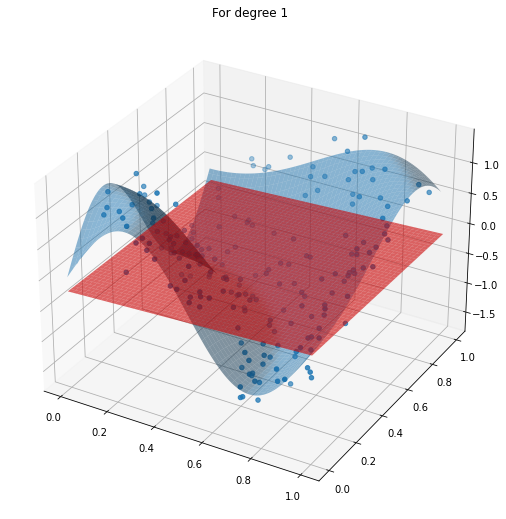

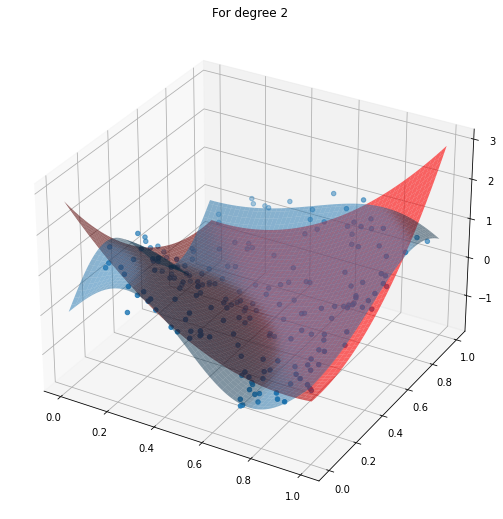

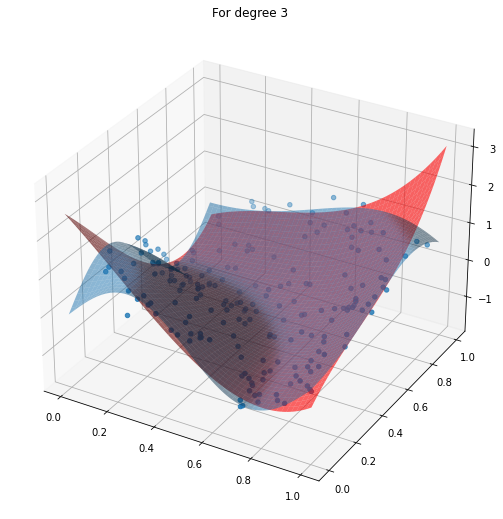

In [47]:
print("Graph for Train data")
for degree in range(len(k)):
    fig = plt.figure(figsize = (14, 9))
    ax = plt.axes(projection ='3d')


    x = np.arange(0, 1, 0.01)
    y = np.arange(0, 1, 0.01)
    x, y = np.meshgrid(x, y)
    z = np.sin(2 * np.pi * np.sqrt(x**2 + y**2))

    ax.plot_surface(x, y, z, alpha = 0.5)


    x1 = np.linspace(0,1,1000)
    x2 = np.linspace(0,1,1000)
    Z = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            Z[i][j] = eval_poly(x1[i],x2[j],degree,arr_poly_bivarite)
            
    x1, x2 = np.meshgrid(x1, x2)
    ax.plot_surface(x1, x2, Z, color = 'red', alpha = 0.6)


    x = train[: , 0]
    y = train[: , 1]
    z = train[: , 2]
    ax.scatter3D(x, y, z)
    ax.set_title("For degree {} ".format(k[degree]) )


    plt.show()

Graph for TEST data


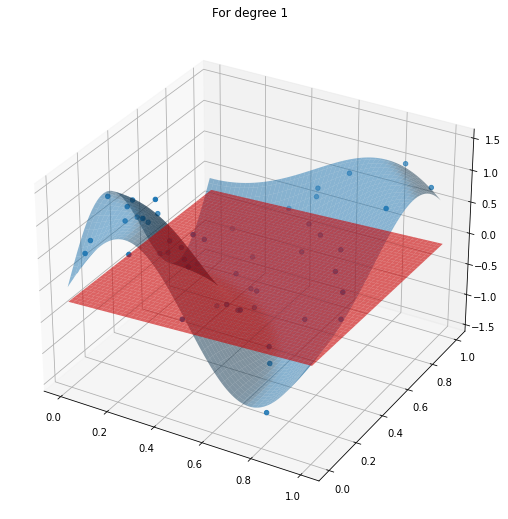

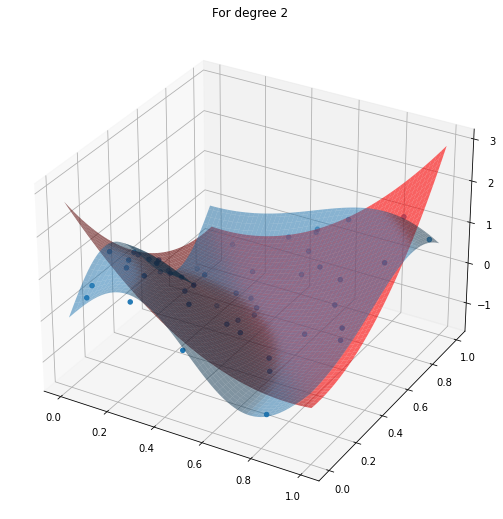

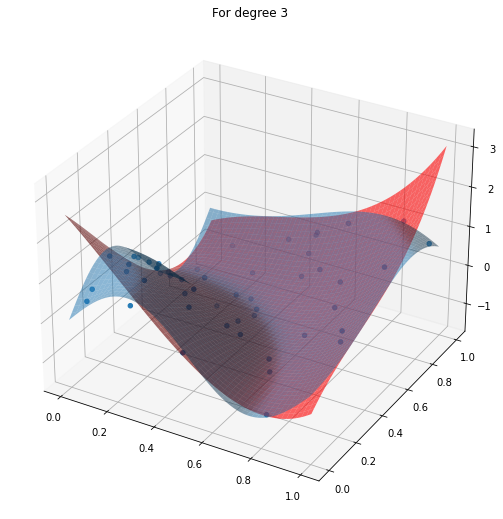

In [48]:
print("Graph for TEST data")
for degree in range(len(k)):
    fig = plt.figure(figsize = (14, 9))
    ax = plt.axes(projection ='3d')


    x = np.arange(0, 1, 0.01)
    y = np.arange(0, 1, 0.01)
    x, y = np.meshgrid(x, y)
    z = np.sin(2 * np.pi * np.sqrt(x**2 + y**2))

    ax.plot_surface(x, y, z, alpha = 0.5)


    x1 = np.linspace(0,1,1000)
    x2 = np.linspace(0,1,1000)
    Z = np.zeros((len(x1), len(x2)))
    for i in range(len(x1)):
        for j in range(len(x2)):
            Z[i][j] = eval_poly(x1[i],x2[j],degree,arr_poly_bivarite)
    x1, x2 = np.meshgrid(x1, x2)
    ax.plot_surface(x1, x2, Z, color = 'red', alpha = 0.6)


    x = test[: , 0]
    y = test[: , 1]
    z = test[: , 2]
    ax.scatter3D(x, y, z)
    ax.set_title("For degree {} ".format(k[degree]) )


    plt.show()

## Real-world Datasets

In [50]:
def get_w_and_b(M):
    w = np.random.uniform(low=-2,high=2,size= M)
    b = np.random.uniform(low=-2,high=2,size=M)
    return w,b

In [51]:
def sigmoid_fun(w,b,x):
  ans  = 1/(1+(np.exp(-(w*np.array(x) + b))))
  return ans

In [52]:
def get_A_for_sigmoid_basis_function(M,X,W,B,l):
  A = []
  for i in range(M):
    A.append(sigmoid_fun(W[i],B[i],X))
  A.append(np.ones(l))
  A = np.array(A)
  return A.T

In [53]:
def get_regularized_coefficients_for_sigmoid_basis_fun(A,Y,Lembda,M):
    u = np.matmul((np.linalg.inv(np.add(Lembda*np.identity(int(M+1)),np.matmul(A.T,A)))),(np.matmul(A.T,Y)))
    return u

In [54]:
def get_Lembda_for_sigmoid(M,tune_set,A,Y,l):
  Min = 0
  RMSE_array = [0]*(len(tune_set))
  for i in range(len(tune_set)):
    Lembda = tune_set[i]
    u = get_regularized_coefficients_for_sigmoid_basis_fun(A,Y,Lembda,M)
    Predicted_Y = get_predicted_Y(A,u)
    rmse = RMSE(Y,Predicted_Y,l)
    RMSE_array[i] = rmse
    if rmse < RMSE_array[Min]:
      min = i
  Lembda = tune_set[Min]
  return Lembda

In [55]:
def get_list_of_A_and_u_for_sigmoid(X,Y,Lembda,list_of_M,list_of_W,list_of_B,l):
    list_of_u = []
    list_of_A = []
    for i in range(len(list_of_M)):
        A = get_A_for_sigmoid_basis_function(list_of_M[i],X,list_of_W[i],list_of_B[i],l)
        list_of_A.append(A)
        u = get_regularized_coefficients_for_sigmoid_basis_fun(A,Y,Lembda,list_of_M[i])
        list_of_u.append(u)
    return list_of_A,list_of_u

In [56]:
def plot_graph_of_estimated_function_by_sigmoid(X,Y,Lembda,list_of_M,list_of_W,list_of_B,l):  
  list_of_A,list_of_u = get_list_of_A_and_u_for_sigmoid(X,Y,Lembda,list_of_M,list_of_W,list_of_B,l)
  
  list_of_z = []
  x = np.linspace(-200,200,1000)
  for i in range(len(list_of_u)):
    z = 0
    for j in range(len(list_of_u[i])-1):
        z += (list_of_u[i][j]*(sigmoid_fun(list_of_W[i][j],list_of_B[i][j],x)))
    z += list_of_u[i][len(list_of_u[i])-1]*1
    list_of_z.append(z)

  
  for i in range(len(list_of_M)):
    plt.plot(x,list_of_z[i], label = "Graph for M = {}".format(list_of_M[i]))
  
  plt.title('Given Data')
  plt.xlabel('X axis')
  plt.ylabel('Y axis')
  plt.xlim(-10,10)
  plt.legend(loc='best', fontsize='small')
  plt.grid()
  plt.show()

  list_of_predicted_y = []
  for i in range(len(list_of_M)):
    predicted_y = get_predicted_Y(list_of_A[i],list_of_u[i])
    list_of_predicted_y.append(predicted_y)
  
  list_of_RMSE = []
  for i in range(len(list_of_M)):
    r = RMSE(Y,list_of_predicted_y[i],l)
    list_of_RMSE.append(r)
  
  for i in range(len(list_of_M)):
    print("RMSE for M = {} is {}".format(list_of_M[i],list_of_RMSE[i]))

In [57]:
def leave_one_out_method(X,Y,M,W,B,Lembda):
  list_of_rmse = []
  for i in range(len(X)):
    Train_x,Train_y,Test_x,Test_y = get_splited_data(X,Y,i)
    Train_A = get_A_for_sigmoid_basis_function(M,Train_x,W,B,len(Train_x))
    Test_A = get_A_for_sigmoid_basis_function(M,Test_x,W,B,1)
    u = get_regularized_coefficients_for_sigmoid_basis_fun(Train_A,Train_y,Lembda,M)
    Predicted_y = get_predicted_Y(Test_A,u)
    rmse = RMSE(Test_y,Predicted_y,1)
    list_of_rmse.append(rmse)
  return list_of_rmse

In [58]:
def get_splited_data(X,Y,index):
  temp_index = list(range(len(X)))
  temp_index.pop(index)
  Train_x = X[temp_index]
  Train_y = Y[temp_index]
  Test_x = [X[index]]
  Test_y = [Y[index]]
  return Train_x,Train_y,Test_x,Test_y

#### a) Consider the motorcycle dataset. Estimate the Regularized Least Square regression models using the M sigmoidal basis functions. The kth sigmoidal basis function can be obtained using

#### σ(wk, bk, x) = 1 / 1 + e^−(wkTx+bk)

#### where , wk is any vector of R

#### n and bk is a real number

#### I. Plot the estimated function and obtain the training RMSE error for M = 2, 5, 10. What happens when you increase the number of basis functions.

In [72]:
tune_set = [2**-7,2**-6,2**-5,2**-4,2**-3,2**-2,2**-1,2**0,2**1,2**2,2**3,2**4,2**5,2**6,2**7]

In [67]:
data = pd.read_csv('C:\\Users\\BHARGAV PANDYA\\Assignment\\ML\\motorcycle.csv')

In [68]:
X = np.array(data['x'])
Y = np.array(data['y'])

In [69]:
list_of_M = [2,5,10]
list_of_W = []
list_of_B = []
for i in range(len(list_of_M)):
  w,b = get_w_and_b(list_of_M[i])
  list_of_W.append(w)
  list_of_B.append(b)

In [74]:
def get_predicted_Y(A,u):
    new_Y = np.matmul(A,u)
    return new_Y

In [76]:
def RMSE(Y,predicted_Y,l):
    ans = math.sqrt(sum((Y - predicted_Y)**2)/l)
    return ans

In [77]:
for i in range(len(list_of_M)):
  A = get_A_for_sigmoid_basis_function(list_of_M[i],X,list_of_W[i],list_of_B[i],133)
  print(get_Lembda_for_sigmoid(list_of_M[i],tune_set,A,Y,133))

0.0078125
0.0078125
0.0078125


In [78]:
Lembda = 0.0078125

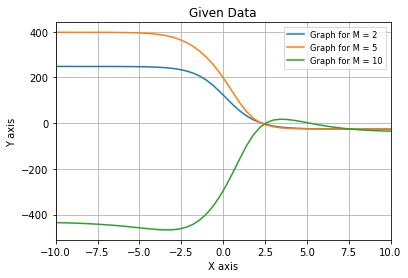

RMSE for M = 2 is 47.96448006488785
RMSE for M = 5 is 47.99600161341003
RMSE for M = 10 is 47.05545145819892


In [79]:
plot_graph_of_estimated_function_by_sigmoid(X,Y,Lembda,list_of_M,list_of_W,list_of_B,133)

#### II. For M =10, find the minimum mean and standard deviations of RMSE using  leave-one out method by tuning the parameter λ.

In [80]:
M = 10
W,B = get_w_and_b(M) 

In [81]:
list_of_rmse = leave_one_out_method(X,Y,M,W,B,Lembda)

In [82]:
print("The minimum of RMSE by leave one out method is",min(list_of_rmse))

The minimum of RMSE by leave one out method is 0.14343144377822625


In [83]:
print("The mean of RMSE by leave one out method is",np.mean(np.array(list_of_rmse)))

The mean of RMSE by leave one out method is 33.45885436859754


In [84]:
print("The standard of deviations RMSE by leave one out method is",np.std(np.array(list_of_rmse)))

The standard of deviations RMSE by leave one out method is 23.73955448177958


In [85]:
print("The standard of deviations RMSE by leave one out method is",np.std(np.array(list_of_rmse)))

The standard of deviations RMSE by leave one out method is 23.73955448177958


## Kernal Function

In [86]:
def Gaussian_kernal_fun(x,z,sigma):
  ans = math.exp(-((math.sqrt(sum((np.array(x)-np.array(z))**2)))/(2*(sigma**2))))
  return ans

In [87]:
def kernal_matrix_for_train_data(X,sigma,l):
  k = []
  for i in range(l):
    k.append([])
    for j in range(l+1):
      k[i].append(1)
  for i in range(l):
    for j in range(l):
      k[i][j] = Gaussian_kernal_fun([X[i]],[X[j]],sigma)
  return np.array(k)

In [88]:
def kernal_matrix_for_test_data(train_x,test_x,sigma):
  k = []
  for i in range(len(test_x)):
    k.append([])
    for j in range(len(train_x)+1):
      k[i].append(1)
  for i in range(len(test_x)):
    for j in range(len(train_x)):
      k[i][j] = Gaussian_kernal_fun([test_x[i]],[train_x[i]],sigma)
  return np.array(k)

In [89]:
def kernal_weights(k,Y,Lembda,l):
  u = np.matmul((np.linalg.inv(np.add(Lembda*np.identity(int(l+1)),np.matmul(k.T,k)))),(np.matmul(k.T,Y)))
  return u

In [90]:
def get_Lembda_and_sigma(X,Y,set_of_sigma,set_of_Lembda):
  opti_rmse = 2**10
  opti_sigma = -1
  opti_Lembda = 2**10
  for lem in set_of_Lembda:
    for sigma in set_of_sigma:
      k = kernal_matrix_for_train_data(X,sigma,133)
      u = kernal_weights(k,Y,lem,133)
      predicted_y = get_predicted_Y(k,u)
      rmse = RMSE(Y,predicted_y,133)
      if rmse < opti_rmse:
        opti_rmse = rmse
        opti_sigma = sigma
        opti_Lembda = lem
  return opti_Lembda,opti_sigma

In [91]:
def leave_one_out_method_for_kernal(X,Y,Lembda,sigma):
  list_of_rmse = []
  for i in range(len(X)):
    Train_x,Train_y,Test_x,Test_y = get_splited_data(X,Y,i)
    Train_k = kernal_matrix_for_train_data(Train_x,sigma,len(Train_x))
    Test_k = kernal_matrix_for_test_data(Train_x,Test_x,sigma)
    u = kernal_weights(Train_k,Train_y,Lembda,len(Train_x))
    predicted_y = get_predicted_Y(Test_k,u)
    rmse = RMSE(Test_y,predicted_y,1)
    list_of_rmse.append(rmse)
  return list_of_rmse

**III Estimate the Regularized Least Square kernel regression model using
Gaussian kernel which is given by k(x, z) = e^(−||x−z||^2/2σ^2)
, for any two points x and z ∈ Rn .**

**Also, find the minimum mean and standard deviations of RMSE using leave-
one out method by tuning the parameter λ and kernel parameter σ .**

In [92]:
set_of_sigma = [2**-7,2**-4,2**-1,2**0,2**1,2**4,2**7]
set_of_Lembda = [2**-7,2**-4,2**-1,2**0,2**1,2**4,2**7]

In [93]:
Lembda, sigma = get_Lembda_and_sigma(X,Y,set_of_sigma,set_of_Lembda)

In [94]:
list_of_rmse_of_kernal = leave_one_out_method_for_kernal(X,Y,Lembda,sigma)

In [95]:
print("The minimum of RMSE by leave one out method is",min(list_of_rmse_of_kernal))

The minimum of RMSE by leave one out method is 1.338148458190517


In [96]:
print("The standard of deviations RMSE by leave one out method is",np.std(np.array(list_of_rmse_of_kernal)))

The standard of deviations RMSE by leave one out method is 31.187633910047136


In [97]:
print("The mean of RMSE by leave one out method is",np.mean(np.array(list_of_rmse_of_kernal)))

The mean of RMSE by leave one out method is 37.58870820135797
